# Туристический бизнес в субъектах Российской Федерации в 2018-2023г.

**Цель проекта:**  
- изучить и визуализируете данные о туризме в субъектах Российской Федерации;

**Задачи:**
- подготовить данные к анализу;
- изучить распределение количества гостиниц, хостелов и санаторно-курортных организаций за 2018–2023 годы;
- определить топ-10 регионов России с наибольшей стоимостью турпакетов в 2023 году;
- визуализировать изменение среднего количества турпакетов в России по категориям с 2018 по 2023 год;
- проверить гипотезу, что средняя стоимость реализованных турпакетов в 2023 году составляет 800 млн рублей;
- проверить гипотезу, что россияне в 2023 году стали чаще ездить по стране и оформлять турпакеты по сравнению с 2022 годом.

## Описание данных

**Таблица `hotel.csv`** — число гостиниц, хостелов, санаторно-курортных организаций и мест в них по субъектам Российской Федерации за 2018–2023 годы.  
**Таблица `count_person_hotel.csv`** — число людей, размещённых в гостиницах по субъектам Российской Федерации в 2023 году.  
**Таблица `tour_firm.csv`** — число оформленных турпакетов в 2018–2023 годы. Скачать файл.  
**Таблица `tour_cost_2023.csv`** — основные показатели деятельности туристических фирм по субъектам Российской Федерации в 2023 году.    

**Поля таблицы `hotel.csv`, которая содержит информацию о числе гостиниц, хостелов, санаторно-курортных организаций и мест в них за период с 2018 по 2023 год по субъектам РФ:**
- `Субъект` — наименование субъекта Российской Федерации.
- `Число гостиниц`
- `Число мест в гостиницах`  
- `Число хостелов`  
- `Число мест в хостелах`  
- `Число санаторно-курортных организаций`  
- `Число мест в санаторно-курортных организациях`  

**Поля таблицы `count_person_hotel.csv`, которая содержит данные с количествои клиентов в гостиницах по субъектам РФ за 2023 год:**  
- `Субъект` — наименование субъекта Российской Федерации.
- `Численность лиц, размещенных в гостиницах в 2023 году`  
- `Численность граждан России, размещенных в гостиницах в 2023 году`  
- `Численность иностранных граждан, размещенных в гостиницах в 2023 году`  

**Поля таблицы `tour_firm.csv`, которая содержит информацию о числе реализованных турпакетов в 2018 - 2023 годах:**  
- `Субъект` — наименование субъекта Российской Федерации;  
- `Общее число турпакетов, реализованных населению, 2018`  
- `Общее число турпакетов, реализованных гражданам России по территории России, 2018`  
- `Общее число турпакетов, реализованных гражданам России по другим странам, 2018`  
- `Общее число турпакетов, реализованных гражданам других стран по территории России, 2018`
- ......
- `Общее число турпакетов, реализованных населению, 2023`  
- `Общее число турпакетов, реализованных гражданам России по территории России, 2023`  
- `Общее число турпакетов, реализованных гражданам России по другим странам, 2023`  
- `Общее число турпакетов, реализованных гражданам других стран по территории России, 2023`

  
**Поля таблицы `tour_cost_2023.csv`, которая содежит данные о стоимости реализованных турпакетов по России и в другие страны в 2023 году:**  
- `Субъект` — наименование субъекта Российской Федерации;  
- `Стоимость реализованных турпакетов в 2023 году, млн руб.`  
- `Стоимость турпакетов реализованных гражданам России по территории России в 2023 году, млн руб.`  
- `Стоимость турпакетов реализованных гражданам России по другим странам в 2023 году, млн руб.`  


## Подготовка данных  

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# Загружаем данные из csv-файлов, в качестве разделителя используется ';'

url_1 = "https://drive.google.com/uc?export=download&id=1kfoNt27Oqdq71QeLhJJOhq-zY3hpDnXp"
url_2 = "https://drive.google.com/uc?export=download&id=1r5KVa9YYOJOQYY9hHM6LZjM5GJ2SJosn"
url_3 = "https://drive.google.com/uc?export=download&id=1I1oqLE4wcYwinsnznAvx0Bf_IcbLEkNY"
url_4 = "https://drive.google.com/uc?export=download&id=1qxzfmoAICmn7JM1e_R585MPuiEzmvu6A"

hotel = pd.read_csv(url_1, sep=';')
tour_cost = pd.read_csv(url_2, sep=';')
tour_firm = pd.read_csv(url_3, sep=';')
count_person_hotel = pd.read_csv(url_4, sep=';')

Далее для каждой таблицы:
1. Проверим названия столбцов. При необходимости преобразуем на более подходящие.
2. Проверим используются ли корректные типы данных. При необходимости оптимизируем их.
3. Проверим наличие пропусков в данных. При необходимости примем решение об их обработке.
4. Проверим корректность значений в числовых столбцах.

### Таблица hotel 

In [7]:
# Снимаем ограничение количества отображаемых столбцов 
pd.set_option('display.max_columns', None)

In [8]:
# Выводим информацию о датафрейме
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 37 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Субъект                                              81 non-null     object
 1   Число гостиниц, 2018                                 81 non-null     int64 
 2   Число гостиниц, 2019                                 81 non-null     int64 
 3   Число гостиниц, 2020                                 81 non-null     int64 
 4   Число гостиниц, 2021                                 81 non-null     int64 
 5   Число гостиниц, 2022                                 81 non-null     int64 
 6   Число гостиниц, 2023                                 81 non-null     int64 
 7   Число мест в гостиницах, 2018                        81 non-null     int64 
 8   Число мест в гостиницах, 2019                        81 non-null     int64 
 9   Ч

1. Названия столбцов очень подробные, однако для удобства заменим на более лаконичные, переведем их на английский и запишем в формате `snake_case`
2. Обработка пропусков не требуется, в таблице их нет.
3. Часть числовых столбцов имеют некорректный тип данных - `object`. Вероятно в данных присутствуют значения, которые невозможно преобразовать как числа

#### Таблица hotel: названия столбцов 

In [9]:
# Создаём список с новыми названиями столбцов и передаем их параметру columns

# Создаем список для новых названий столбцов
list_new_names_columns = ['region']

# Создаем список мест размещения туристов
list_new_names = ['hotels', 'hostels', 'sanatoriums']

# С помощью цикла для каждого места размещения добавим год, потом год и префикс beds, обозначающий спальные места
for new_name in list_new_names:
    for k in range(2018, 2024):
        list_new_names_columns.append(new_name + '_' + str(k))
    for k in range(2018, 2024):
        list_new_names_columns.append('beds_' + new_name + '_' + str(k))

# Передаём параметру columns список с новыми названиями столбцов напрямую
hotel.columns = list_new_names_columns

In [10]:
# Выводим названия столбцов
hotel.columns

Index(['region', 'hotels_2018', 'hotels_2019', 'hotels_2020', 'hotels_2021',
       'hotels_2022', 'hotels_2023', 'beds_hotels_2018', 'beds_hotels_2019',
       'beds_hotels_2020', 'beds_hotels_2021', 'beds_hotels_2022',
       'beds_hotels_2023', 'hostels_2018', 'hostels_2019', 'hostels_2020',
       'hostels_2021', 'hostels_2022', 'hostels_2023', 'beds_hostels_2018',
       'beds_hostels_2019', 'beds_hostels_2020', 'beds_hostels_2021',
       'beds_hostels_2022', 'beds_hostels_2023', 'sanatoriums_2018',
       'sanatoriums_2019', 'sanatoriums_2020', 'sanatoriums_2021',
       'sanatoriums_2022', 'sanatoriums_2023', 'beds_sanatoriums_2018',
       'beds_sanatoriums_2019', 'beds_sanatoriums_2020',
       'beds_sanatoriums_2021', 'beds_sanatoriums_2022',
       'beds_sanatoriums_2023'],
      dtype='object')

#### Таблица hotel: типы данных

Находим значения, которые не позволяют преобразовать данные в числовые. Для этого создаем функцию  `error_detection`, которая будет проверять каждое значение столбца на возможность преобразовать его в число. Если значение в число преобразовать нельзя, то это значение добавляется в список `list_error`. Функцию применим ко всем столбцам имеющим тип `object`. На выходе получим список с нечисловыми значениями. Чтобы значения не дублировались, преобразуем список во множество `set()`.

In [11]:
# создаем список для значений, которые нельзя представить в виде чисел
list_error = []

# Функция поиска ошибок (поиска значений, не преобразуемых в числа)
def error_detection(item):
    try:
        # Предполагаем, что значение — это число
        float(item)
    except:
        # Если значение не число, добавляем в список list_error 
        return list_error.append(item)

# Проходимся по всем числовым столбцам, имеющим тип object и к каждому применяе функцию
for k in range(19, 25) and range(31, 37):
     hotel.iloc[:,k].apply(error_detection)

# Преобразуем в множество, чтобы избавиться от дубликатов
set(list_error)

{'…1'}

In [12]:
# Заменяем значения "…1" на 0 во всем датафрейме
hotel = hotel.replace('…1' , 0)

In [13]:
# для всех столбцов с типом object, кроме "region" меняем тип на "int64"
for name in hotel.columns.tolist():
    if hotel[name].dtypes == object and name != 'region':
        hotel[name] = hotel[name].astype('int64')

Осталось проверим корректность значений в числовых столбцах:

In [14]:
# Выводим информацию о датафрейме
hotel.describe()

,hotels_2018,hotels_2019,hotels_2020,hotels_2021,hotels_2022,hotels_2023,beds_hotels_2018,beds_hotels_2019,beds_hotels_2020,beds_hotels_2021,beds_hotels_2022,beds_hotels_2023,hostels_2018,hostels_2019,hostels_2020,hostels_2021,hostels_2022,hostels_2023,beds_hostels_2018,beds_hostels_2019,beds_hostels_2020,beds_hostels_2021,beds_hostels_2022,beds_hostels_2023,sanatoriums_2018,sanatoriums_2019,sanatoriums_2020,sanatoriums_2021,sanatoriums_2022,sanatoriums_2023,beds_sanatoriums_2018,beds_sanatoriums_2019,beds_sanatoriums_2020,beds_sanatoriums_2021,beds_sanatoriums_2022,beds_sanatoriums_2023
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,144.098765,149.160494,149.037037,159.950617,164.148148,178.024691,10966.814815,11261.074074,11274.666667,12096.814815,12528.629630,13809.456790,22.629630,21.444444,19.358025,22.395062,25.691358,32.246914,1932.395062,1901.839506,2226.617284,2964.950617,3439.827160,4852.098765,21.666667,21.938272,21.617284,21.802469,21.481481,21.456790,5285.617284,5329.802469,5355.580247,5407.456790,5379.456790,5485.493827
std,189.850573,190.102502,186.703873,210.466975,209.092032,242.384249,23272.586894,23384.022458,23256.339677,25308.163929,25647.002026,29623.430566,70.794499,59.026689,45.517389,50.817487,58.738965,94.076369,10537.389585,9095.884907,12248.621211,16041.721154,17784.356698,25701.599961,28.111830,29.335280,28.607939,28.950570,28.162968,27.851862,12264.439935,12314.440075,12358.472230,12708.040813,12574.669653,12989.496459
min,10.000000,12.000000,12.000000,12.000000,11.000000,11.000000,402.000000,461.000000,512.000000,574.000000,533.000000,354.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,63.000000,65.000000,65.000000,67.000000,72.000000,2930.000000,2998.000000,3040.000000,3352.000000,3539.000000,3736.000000,5.000000,5.000000,4.000000,6.000000,6.000000,7.000000,106.000000,144.000000,41.000000,187.000000,241.000000,225.000000,7.000000,7.000000,8.000000,8.000000,8.000000,8.000000,1205.000000,1199.000000,1114.000000,1082.000000,1050.000000,1031.000000
50%,87.000000,96.000000,100.000000,103.000000,111.000000,113.000000,4753.000000,5144.000000,4873.000000,5197.000000,5984.000000,6149.000000,8.000000,8.000000,9.000000,10.000000,11.000000,12.000000,350.000000,417.000000,416.000000,486.000000,522.000000,658.000000,14.000000,14.000000,14.000000,14.000000,13.000000,13.000000,2431.000000,2474.000000,2430.000000,2747.000000,2695.000000,2937.000000
75%,160.000000,175.000000,179.000000,204.000000,195.000000,212.000000,9605.000000,10138.000000,10484.000000,10500.000000,11122.000000,11620.000000,18.000000,18.000000,19.000000,23.000000,23.000000,26.000000,814.000000,914.000000,918.000000,1025.000000,1082.000000,1393.000000,24.000000,23.000000,23.000000,23.000000,24.000000,24.000000,4618.000000,4790.000000,4840.000000,4786.000000,4662.000000,4438.000000
max,1369.000000,1369.000000,1443.000000,1662.000000,1627.000000,1896.000000,151687.000000,149634.000000,165501.000000,184431.000000,183991.000000,219300.000000,613.000000,511.000000,392.000000,432.000000,492.000000,809.000000,94749.000000,81148.000000,109973.000000,142507.000000,156855.000000,224578.000000,186.000000,206.000000,192.000000,202.000000,191.000000,189.000000,98378.000000,99231.000000,99538.000000,102948.000000,101771.000000,105681.000000


Названия столбцов удобны для работы, пропусков нет, типы данных соответствуют содержанию, числовые значения адекватные.

### Таблица tour_cost

In [15]:
# Выводим информацию о датафрейме
tour_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   Субъект                                                                                          87 non-null     object
 1   Стоимость реализованных турпакетов в 2023 году, млн руб.                                         87 non-null     object
 2   Стоимость турпакетов  реализованных гражданам России по территории России в 2023 году, млн руб.  87 non-null     object
 3   Стоимость турпакетов  реализованных гражданам России по другим странам в 2023 году, млн руб.     87 non-null     object
dtypes: object(4)
memory usage: 2.8+ KB


1. Названия столбцов для удобства заменим на более лаконичные, переведем их на английский и запишем в формате `snake_case`
2. Обработка пропусков не требуется, в таблице их нет.
3. Все числовые столбцы имеют некорректный тип данных - `object`. Вероятно в данных присутствуют значения, которые невозможно преобразовать как числа

#### Таблица tour_cost: названия столбцов

In [16]:
# Создаем список с новыми названиями столбцов
list_new_name = ['region', 'cost_tour_total_million_2023', 'cost_tour_domestic_million_2023', 'cost_tour_international_million_2023']

# Передаём параметру columns список с новыми названиями столбцов напрямую
tour_cost.columns = list_new_name

In [17]:
# Выводим названия столбцов
tour_cost.columns

Index(['region', 'cost_tour_total_million_2023',
       'cost_tour_domestic_million_2023',
       'cost_tour_international_million_2023'],
      dtype='object')

#### Таблица tour_cost: типы данных

Находим значения, которые не позволяют преобразовать данные в числовые. Для этого воспользуемся ранее созданной функцией `error_detection()`. Полученный список с нечисловыми значениями также преобразуем во множество.

In [18]:
# создаем список для значений не являющихся числовыми
list_error = []

# Проходимся по всем числовым столбцам, имеющим тип object и к каждому применяе функцию
for k in range(1, 4):
     tour_cost.iloc[:,k].apply(error_detection)

# Преобразуем в множество, чтобы избавиться от дубликатов
set(list_error)

{'…1'}

In [19]:
# Заменяем значения "…1" на 0 
tour_cost = tour_cost.replace('…1' , 0)

In [20]:
# для всех столбцов с типом object, кроме "субъект" меняем тип на "float64"
for name in tour_cost.columns.tolist():
    if tour_cost[name].dtypes == object and name != 'region':
        tour_cost[name] = tour_cost[name].astype('float64')

In [21]:
# Выводим информацию о датафрейме
tour_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   region                                87 non-null     object 
 1   cost_tour_total_million_2023          87 non-null     float64
 2   cost_tour_domestic_million_2023       87 non-null     float64
 3   cost_tour_international_million_2023  87 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.8+ KB


Проверим корректность числовых значений:

In [22]:
# Выводим информацию о датафрейме
tour_cost.describe()

,cost_tour_total_million_2023,cost_tour_domestic_million_2023,cost_tour_international_million_2023
count,87.000000,87.000000,87.000000
mean,8381.963525,1939.757334,6420.715214
std,41491.282607,6691.369041,34780.467153
min,0.000000,0.000000,0.000000
25%,1075.697800,270.611650,617.324000
50%,2467.642900,614.216700,1564.259600
75%,4777.272550,1453.191250,3228.626900
max,388215.547700,61611.108500,325476.700800


Названия столбцов удобны для работы, пропусков нет, типы данных соответствуют содержанию, числовые значения адекватные.

### Таблица tour_firm

In [23]:
# Выводим информацию о датафрейме
tour_firm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 25 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Субъект                                                                                  82 non-null     object 
 1   Общее число турпакетов, реализованных населению, 2018                                    82 non-null     object 
 2   Общее число турпакетов, реализованных гражданам России по территории России, 2018        82 non-null     object 
 3   Общее число турпакетов, реализованных гражданам России по другим странам, 2018           81 non-null     object 
 4   Общее число турпакетов, реализованных гражданам других стран по территории России, 2018  62 non-null     float64
 5   Общее число турпакетов, реализованных населению, 2019             

1. Названия столбцов для удобства заменим на более лаконичные, переведем их на английский и запишем в формате `snake_case`
2. В таблице есть пропуски.
3. Все числовые столбцы имеют некорректный тип данных - `object` и `float`. Вероятно в данных присутствуют значения, которые невозможно преобразовать как числа

#### Таблица tour_firm: названия столбцов

In [24]:
# Создаём список с новыми названиями столбцов и передаем их параметру columns

# Создаем список для новых названий столбцов
list_new_names_columns = ['region']

# Создаем список шаблонов
list_new_names = ['count_tour_total', 'count_tour_domestic', 'count_tour_international', 'count_tour_foreigners_in_russia']

# С помощью цикла для каждого элемента из списка list_new_names добавим год
for k in range(2018, 2024):
    for new_name in list_new_names:
        list_new_names_columns.append(new_name + '_' + str(k))

# Передаём параметру columns список с новыми названиями столбцов напрямую
tour_firm.columns = list_new_names_columns

In [25]:
# Выводим названия столбцов
tour_firm.columns

Index(['region', 'count_tour_total_2018', 'count_tour_domestic_2018',
       'count_tour_international_2018', 'count_tour_foreigners_in_russia_2018',
       'count_tour_total_2019', 'count_tour_domestic_2019',
       'count_tour_international_2019', 'count_tour_foreigners_in_russia_2019',
       'count_tour_total_2020', 'count_tour_domestic_2020',
       'count_tour_international_2020', 'count_tour_foreigners_in_russia_2020',
       'count_tour_total_2021', 'count_tour_domestic_2021',
       'count_tour_international_2021', 'count_tour_foreigners_in_russia_2021',
       'count_tour_total_2022', 'count_tour_domestic_2022',
       'count_tour_international_2022', 'count_tour_foreigners_in_russia_2022',
       'count_tour_total_2023', 'count_tour_domestic_2023',
       'count_tour_international_2023',
       'count_tour_foreigners_in_russia_2023'],
      dtype='object')

#### Таблица tour_firm: пропуски

In [26]:
# Найдем общее число пропусков в датафрейме
tour_firm.isna().sum().sum()

201

In [27]:
# Найдем долю пропусков в каждом столбце
tour_firm.isna().mean() * 100

region                                   0.000000
count_tour_total_2018                    0.000000
count_tour_domestic_2018                 0.000000
count_tour_international_2018            1.219512
count_tour_foreigners_in_russia_2018    24.390244
count_tour_total_2019                    0.000000
count_tour_domestic_2019                 0.000000
count_tour_international_2019            0.000000
count_tour_foreigners_in_russia_2019    23.170732
count_tour_total_2020                    0.000000
count_tour_domestic_2020                 0.000000
count_tour_international_2020            0.000000
count_tour_foreigners_in_russia_2020    47.560976
count_tour_total_2021                    1.219512
count_tour_domestic_2021                 1.219512
count_tour_international_2021            2.439024
count_tour_foreigners_in_russia_2021    45.121951
count_tour_total_2022                    0.000000
count_tour_domestic_2022                 0.000000
count_tour_international_2022            1.219512


Большой процент пропусков в столбцах с числом турпакетов, реализованных гражданам других стран по территории России. Вероятно пропуски в данных связаны с отсутствием продаж турпакетов. Заменим пропущенные значения на 0

In [28]:
# Заменяем пропуски на 0
tour_firm = tour_firm.fillna(0)

#### Таблица tour_firm: типы данных

Находим значения, которые не позволяют преобразовать данные в числовые. Для этого воспользуемся ранее созданной функцией `error_detection()`. Полученный список с нечисловыми значениями также преобразуем во множество.

In [29]:
# создаем список для значений не являющихся числовыми
list_error = []

# Проходимся по всем числовым столбцам, имеющим тип object и к каждому применяе функцию
for k in range(1, 25):
     tour_firm.iloc[:,k].apply(error_detection)

# Преобразуем в множество, чтобы избавиться от дубликатов
set(list_error)

{'…1'}

In [30]:
# Заменяем значения "…1" на 0 
tour_firm = tour_firm.replace('…1' , 0)

In [31]:
# для всех столбцов кроме "субъект" меняем тип на "int64"
for name in tour_firm.columns.tolist():
    if name != 'region' :
        tour_firm[name] = tour_firm[name].astype('int64')

In [32]:
# Выводим информацию о датафрейме
tour_firm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   region                                82 non-null     object
 1   count_tour_total_2018                 82 non-null     int64 
 2   count_tour_domestic_2018              82 non-null     int64 
 3   count_tour_international_2018         82 non-null     int64 
 4   count_tour_foreigners_in_russia_2018  82 non-null     int64 
 5   count_tour_total_2019                 82 non-null     int64 
 6   count_tour_domestic_2019              82 non-null     int64 
 7   count_tour_international_2019         82 non-null     int64 
 8   count_tour_foreigners_in_russia_2019  82 non-null     int64 
 9   count_tour_total_2020                 82 non-null     int64 
 10  count_tour_domestic_2020              82 non-null     int64 
 11  count_tour_international_2020     

In [33]:
# Выводим информацию о датафрейме
tour_firm.describe()

,count_tour_total_2018,count_tour_domestic_2018,count_tour_international_2018,count_tour_foreigners_in_russia_2018,count_tour_total_2019,count_tour_domestic_2019,count_tour_international_2019,count_tour_foreigners_in_russia_2019,count_tour_total_2020,count_tour_domestic_2020,count_tour_international_2020,count_tour_foreigners_in_russia_2020,count_tour_total_2021,count_tour_domestic_2021,count_tour_international_2021,count_tour_foreigners_in_russia_2021,count_tour_total_2022,count_tour_domestic_2022,count_tour_international_2022,count_tour_foreigners_in_russia_2022,count_tour_total_2023,count_tour_domestic_2023,count_tour_international_2023,count_tour_foreigners_in_russia_2023
count,8.200000e+01,82.000000,82.000000,82.000000,8.200000e+01,82.000000,8.200000e+01,82.000000,8.200000e+01,8.200000e+01,82.000000,82.00000,8.200000e+01,8.200000e+01,8.200000e+01,82.000000,8.200000e+01,8.200000e+01,8.200000e+01,82.000000,8.200000e+01,8.200000e+01,8.200000e+01,82.000000
mean,5.587656e+04,19935.000000,31393.963415,4571.865854,6.499565e+04,25697.109756,3.546899e+04,3829.548780,3.809543e+04,2.552463e+04,12346.682927,224.54878,5.866010e+04,3.482818e+04,2.369085e+04,149.768293,6.435605e+04,3.697041e+04,2.725979e+04,129.304878,7.765872e+04,4.064998e+04,3.669041e+04,323.682927
std,1.383382e+05,38842.424076,96756.068834,20297.047534,2.068448e+05,75933.713862,1.245388e+05,16103.289993,1.845953e+05,1.222779e+05,62227.645177,907.43142,2.519722e+05,1.358526e+05,1.167335e+05,755.925013,2.692341e+05,1.233908e+05,1.473574e+05,646.093134,3.422280e+05,1.458644e+05,1.969400e+05,1664.319227
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,9.966750e+03,3358.250000,5395.000000,1.000000,1.128325e+04,2971.750000,5.785250e+03,0.000000,3.575250e+03,1.911000e+03,1342.750000,0.00000,6.363250e+03,2.927250e+03,2.297500e+03,0.000000,7.063500e+03,3.903000e+03,2.642750e+03,0.000000,9.400500e+03,4.661000e+03,4.055250e+03,0.000000
50%,2.247400e+04,7277.500000,10726.000000,28.500000,2.288300e+04,7438.000000,1.144700e+04,20.000000,9.650000e+03,4.413500e+03,3083.500000,1.00000,1.586750e+04,8.335000e+03,6.342500e+03,1.000000,1.801300e+04,1.078700e+04,6.717000e+03,1.000000,2.114100e+04,1.210850e+04,8.590500e+03,1.000000
75%,5.111650e+04,21286.500000,24527.000000,601.750000,4.856325e+04,21642.250000,2.602650e+04,429.750000,2.055350e+04,1.622250e+04,5641.750000,31.75000,3.284675e+04,2.366675e+04,1.110050e+04,20.750000,4.079300e+04,2.889600e+04,1.080950e+04,9.500000,4.786650e+04,2.907275e+04,1.601850e+04,20.000000
max,1.141105e+06,233394.000000,860686.000000,156099.000000,1.795809e+06,631769.000000,1.114282e+06,116236.000000,1.670985e+06,1.103909e+06,563993.000000,6823.00000,2.261448e+06,1.202624e+06,1.056771e+06,6417.000000,2.419418e+06,1.077364e+06,1.337117e+06,4937.000000,3.095421e+06,1.293304e+06,1.790081e+06,12036.000000


Названия столбцов удобны для работы, пропусков нет, типы данных соответствуют содержанию, числовые значения адекватные.

### Таблица count_person_hotel

In [34]:
# Выводим информацию о датафрейме
count_person_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 4 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Субъект                                                                82 non-null     object
 1   Численность лиц, размещенных в гостиницах в 2023 году                  82 non-null     int64 
 2   Численность граждан России, размещенных в гостиницах в 2023 году       82 non-null     int64 
 3   Численность иностранных граждан, размещенных в гостиницах в 2023 году  82 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


1. Названия столбцов для удобства заменим на более лаконичные, переведем их на английский и запишем в формате `snake_case`
2. Все числовые столбцы имеют корректный тип данных - int64
3. В данных нет пропусков.

#### Таблица count_person_hotel: названия столбцов

In [35]:
# Создаем список с новыми названиями столбцов
list_new_name = ['region', 'count_persons_in_hotel_total_2023', 'count_russian_persons_in_hotel_2023', 'count_foreign_persons_in_hotel_2023']

# Передаём параметру columns список с новыми названиями столбцов напрямую
count_person_hotel.columns = list_new_name

In [36]:
# Выводим названия столбцов
count_person_hotel.columns

Index(['region', 'count_persons_in_hotel_total_2023',
       'count_russian_persons_in_hotel_2023',
       'count_foreign_persons_in_hotel_2023'],
      dtype='object')

In [37]:
# Выводим информацию о датафрейме
count_person_hotel.describe()

,count_persons_in_hotel_total_2023,count_russian_persons_in_hotel_2023,count_foreign_persons_in_hotel_2023
count,8.200000e+01,8.200000e+01,8.200000e+01
mean,6.841199e+05,6.526328e+05,3.148709e+04
std,1.375353e+06,1.257496e+06,1.369378e+05
min,7.664000e+03,7.532000e+03,1.320000e+02
25%,1.796448e+05,1.746580e+05,2.752750e+03
50%,3.043885e+05,2.928150e+05,7.463500e+03
75%,6.659235e+05,6.488710e+05,1.545375e+04
max,9.896299e+06,8.704963e+06,1.191336e+06


Названия столбцов удобны для работы, пропусков нет, типы данных соответствуют содержанию, числовые значения адекватные.

## Исследовательский анализ данных   
1. Изучим распределение количества гостиниц, хостелов и санаторно-курортных организаций за 2018–2023 годы.
2. Определим топ-10 регионов России с наибольшей стоимостью турпакетов в 2023 году.
3. Построим линейный график, который покажет изменения среднего количества турпакетов в России по категориям с 2018 по 2023 год.

### Распределение количества гостиниц, хостелов и санаторно-курортных организаций за 2018–2023 годы.

In [38]:
# Выводим первые строки необходимого датафрейма
hotel.head()

,region,hotels_2018,hotels_2019,hotels_2020,hotels_2021,hotels_2022,hotels_2023,beds_hotels_2018,beds_hotels_2019,beds_hotels_2020,beds_hotels_2021,beds_hotels_2022,beds_hotels_2023,hostels_2018,hostels_2019,hostels_2020,hostels_2021,hostels_2022,hostels_2023,beds_hostels_2018,beds_hostels_2019,beds_hostels_2020,beds_hostels_2021,beds_hostels_2022,beds_hostels_2023,sanatoriums_2018,sanatoriums_2019,sanatoriums_2020,sanatoriums_2021,sanatoriums_2022,sanatoriums_2023,beds_sanatoriums_2018,beds_sanatoriums_2019,beds_sanatoriums_2020,beds_sanatoriums_2021,beds_sanatoriums_2022,beds_sanatoriums_2023
0,Белгородская область,97,101,103,100,101,99,4753,5144,5390,5437,5439,5486,7,11,11,11,10,8,192,288,367,366,260,200,11,11,11,11,11,11,1969,1938,1969,1969,2212,1999
1,Брянская область,74,78,86,92,91,93,3436,3507,3782,4131,4254,4414,0,0,0,0,2,3,0,0,0,0,0,0,15,14,14,14,14,13,2953,2829,2430,2837,2672,2937
2,Владимирская область,100,100,114,119,121,125,7679,8059,8815,8446,8913,10049,20,18,13,13,19,14,954,914,682,590,964,754,6,7,6,8,9,8,1220,1324,1205,1530,1542,1328
3,Воронежская область,141,147,151,163,170,179,9605,10419,10040,10500,10390,11468,18,10,8,7,11,9,1257,505,455,215,353,269,16,15,15,15,14,14,3241,3302,3320,3320,3243,3337
4,Ивановская область,48,52,55,74,64,59,2774,2998,3009,3796,3283,3353,7,6,6,11,9,9,184,144,139,191,255,201,14,14,14,17,15,15,4347,4341,4485,4616,4396,4293


На основе датафрейма `hotel` подготовим данные:
1. датафрейм с данными по гостиницам за 2018-2023 г
2. датафрейм с данными по хостелам за 2018-2023 г
3. датафрейм с данными по санаторно-курортным организациям за 2018-2023 г

In [39]:
# Создадим списки c названиями столбцов датафрейма hotel для каждого вида заведения

# Создаем пустые списки для названий столбцов по каждому вида заведения
columns_hotels = []
columns_hostels = []
columns_sanatoriums = []

# С помощью цикла добавим года с 2018 по 2023 для каждого вида заведения
for k in range(2018, 2024):
    columns_hotels.append('hotels'+'_'+str(k))
    columns_hostels.append('hostels'+'_'+str(k))
    columns_sanatoriums.append('sanatoriums'+'_'+str(k))
    
#Создадим 3 датафрема, выбрав из датафрейма hotel необходимые столбцы
count_hotels_2018_2023 = hotel[columns_hotels]
count_hostels_2018_2023 = hotel[columns_hostels]
count_sanatoriums_2018_2023 = hotel[columns_sanatoriums]

#### Распределение числа гостиниц за период с 2018г по 2023г

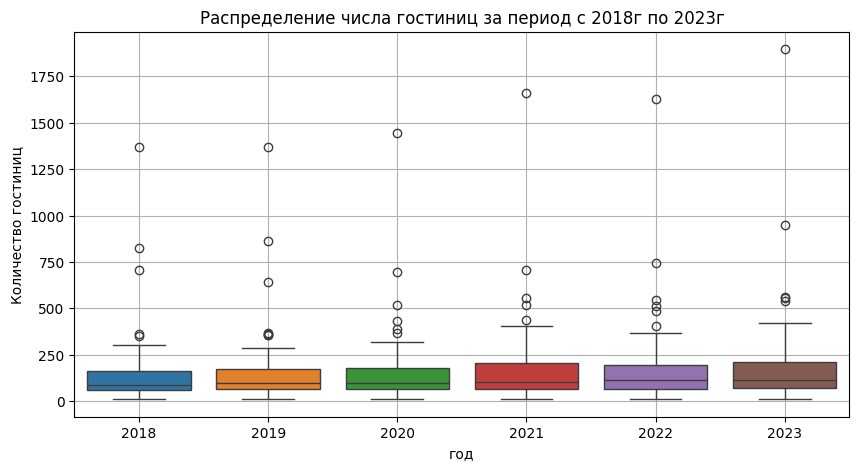

In [40]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 5))

# Строим горизонтальную диаграмму размаха
sns.boxplot(count_hotels_2018_2023)

# Добавляем заголовок и подписи
plt.title('Распределение числа гостиниц за период с 2018г по 2023г')
plt.xlabel('год')
plt.ylabel('Количество гостиниц')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["2018", "2019", "2020", "2021", "2022", "2023"])
# Добавляем сетку
plt.grid(True)
    
# Отображаем график
plt.show()


**Распределения характеризуются широким разбросом и длинными «хвостами» в области больших значений. Такие высокие значения говорят о хорошо развитом гостиничном бизнесе в некоторых региона РФ.**

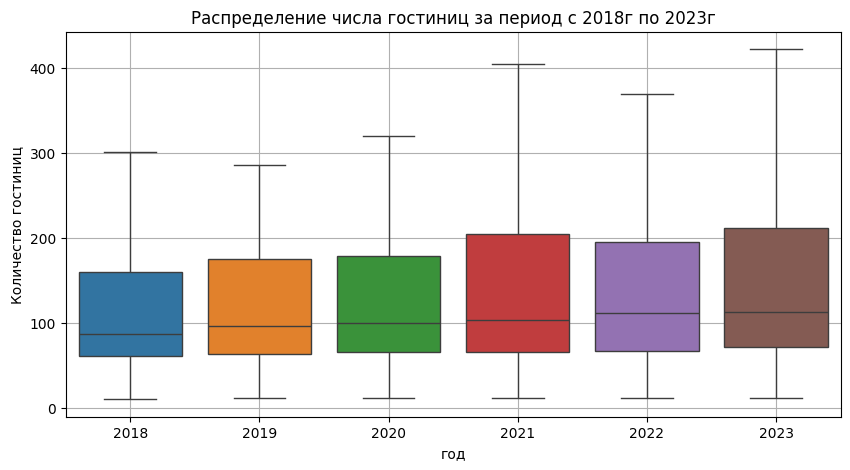

In [41]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 5))

# Строим горизонтальную диаграмму размаха без выбросов
sns.boxplot(count_hotels_2018_2023, showfliers=False)

# Добавляем заголовок и подписи
plt.title('Распределение числа гостиниц за период с 2018г по 2023г')
plt.xlabel('год')
plt.ylabel('Количество гостиниц')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["2018", "2019", "2020", "2021", "2022", "2023"])
# Добавляем сетку
plt.grid(True)
    
# Отображаем график
plt.show()


**Медианные значения показывают медленный, но рост количества гостиниц регионах РФ** 

#### Распределение числа хостелов за период с 2018г по 2023г

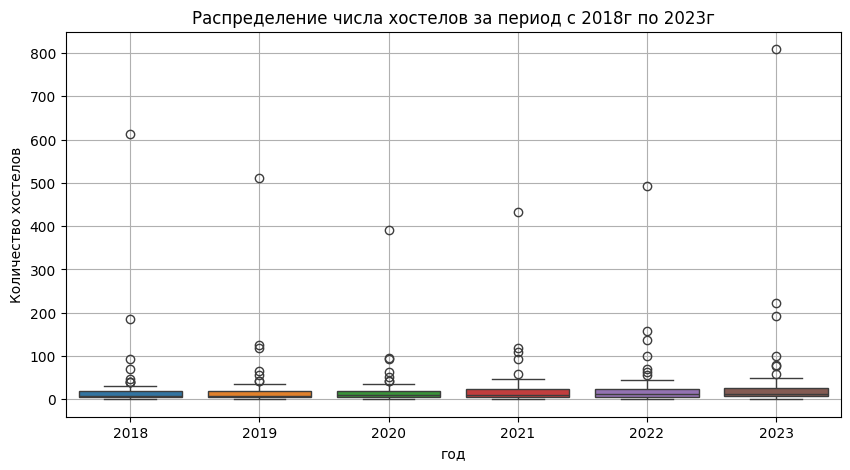

In [42]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 5))

# Строим горизонтальную диаграмму размаха
sns.boxplot(count_hostels_2018_2023)

# Добавляем заголовок и подписи
plt.title('Распределение числа хостелов за период с 2018г по 2023г')
plt.xlabel('год')
plt.ylabel('Количество хостелов')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["2018", "2019", "2020", "2021", "2022", "2023"])
# Добавляем сетку
plt.grid(True)
    
# Отображаем график
plt.show()


**Распределения характеризуются широким разбросом и длинными «хвостами» в области больших значений. Такие высокие значения говорят о популярности хостелов в некоторых регионах. При этом наблюдается снижение экстремально высоких значений с 2018 по 2020 год, с последующим ростом к 2023 году.**

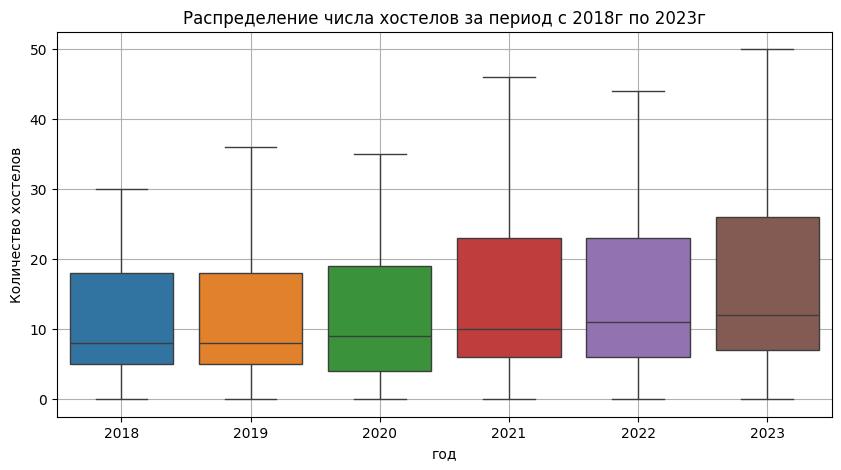

In [43]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 5))

# Строим горизонтальную диаграмму размаха
sns.boxplot(count_hostels_2018_2023, showfliers=False)

# Добавляем заголовок и подписи
plt.title('Распределение числа хостелов за период с 2018г по 2023г')
plt.xlabel('год')
plt.ylabel('Количество хостелов')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["2018", "2019", "2020", "2021", "2022", "2023"])
# Добавляем сетку
plt.grid(True)
    
# Отображаем график
plt.show()


**Медианные значения показывают медленный, но рост количества хостелов в регионах РФ**

#### Распределение числа санаторно-курортных организаций за период с 2018г по 2023г

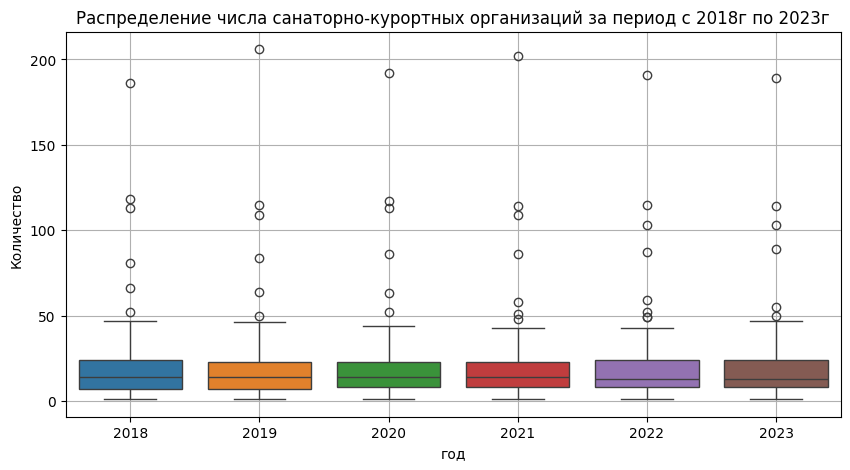

In [44]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 5))

# Строим горизонтальную диаграмму размаха
sns.boxplot(count_sanatoriums_2018_2023)

# Добавляем заголовок и подписи
plt.title('Распределение числа санаторно-курортных организаций за период с 2018г по 2023г')
plt.xlabel('год')
plt.ylabel('Количество')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["2018", "2019", "2020", "2021", "2022", "2023"])
# Добавляем сетку
plt.grid(True)
    
# Отображаем график
plt.show()


**Распределения характеризуются широким разбросом и длинными «хвостами» в области больших значений, что говорит о наличии регионов с аномально высоким числом санаторно-курортных организаций. В некоторых регионах более 100–200 санаториев, в то время как у большинства этот показатель ниже 50.**

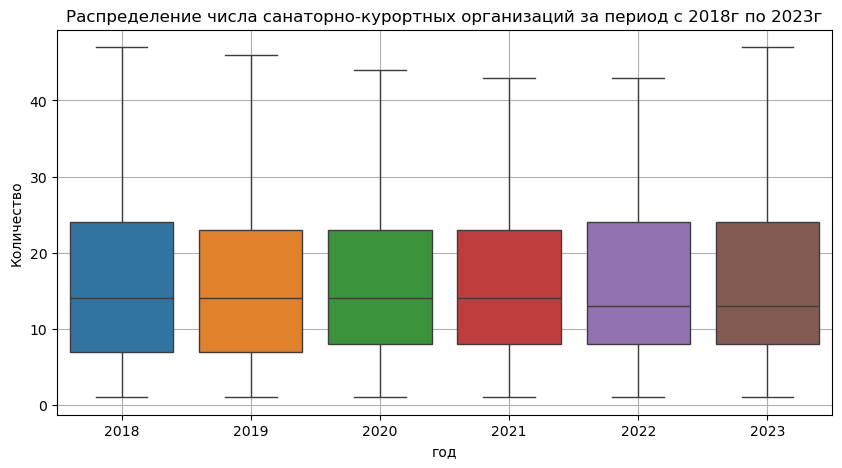

In [132]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 5))

# Строим горизонтальную диаграмму размаха
sns.boxplot(count_sanatoriums_2018_2023, showfliers=False)

# Добавляем заголовок и подписи
plt.title('Распределение числа санаторно-курортных организаций за период с 2018г по 2023г')
plt.xlabel('год')
plt.ylabel('Количество')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["2018", "2019", "2020", "2021", "2022", "2023"])
# Добавляем сетку
plt.grid(True)
    
# Отображаем график
plt.show()


### ТОП-10 регионов России с самой высокой стоимостью туристических пакетов в 2023 году

In [45]:
# Выбираем два столбца с названием субъекта и стоимость, сортируем по убыванию стоимости, сбразываем индексы
tour_cost_total = tour_cost.iloc[:, 0:2].sort_values(by='cost_tour_total_million_2023', ascending=False).reset_index()

# Выбираем первые 5 строк, удаляем столбец со старыми индексами
top10 = tour_cost_total[:10].drop(['index'], axis=1)

#Выводим датафрейм
top10

,region,cost_tour_total_million_2023
0,г. Москва,388215.5477
1,Московская область,27151.9902
2,г. Санкт-Петербург,23785.7731
3,Тюменская область,14332.6665
4,Свердловская область,14271.0682
5,Краснодарский край,14250.5485
6,Республика Татарстан,13768.8762
7,Пермский край,12592.6389
8,Нижегородская область,11545.6481
9,Новосибирская область,10433.0335


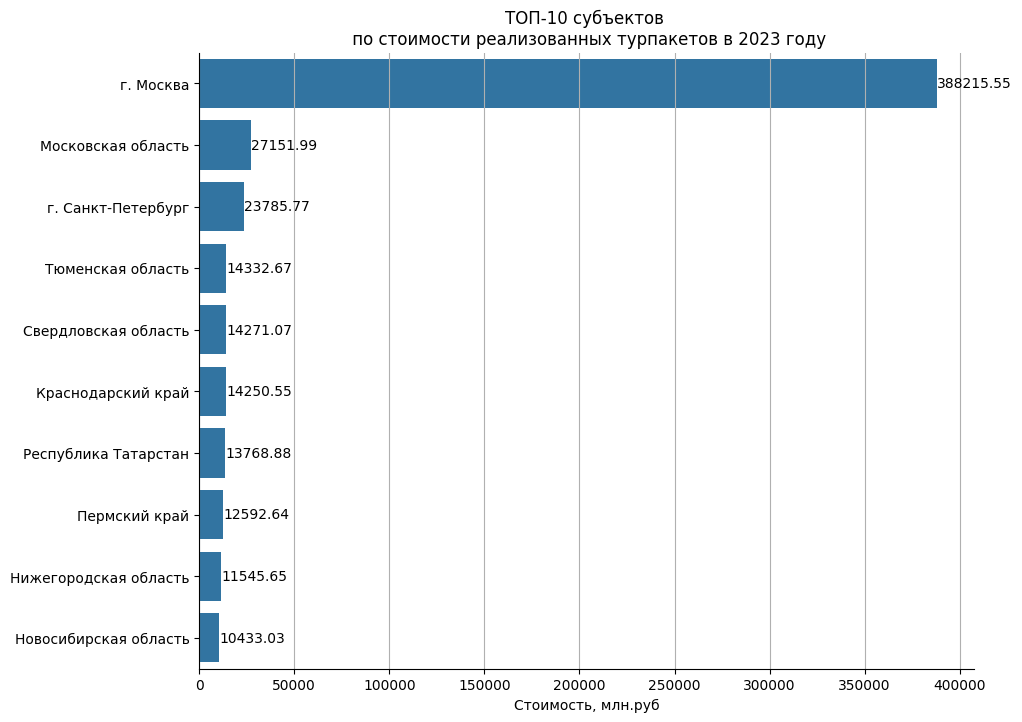

In [52]:
# Задаем размер
plt.figure(figsize=(10, 8))

top10_graf_sns = sns.barplot(data=top10, x='cost_tour_total_million_2023', y='region')

# Добавляем значения к барам, с помощью fmt оставим 2 знака после точки 
plt.bar_label(top10_graf_sns.containers[0],fmt='%.2f')

# Убираем верхнюю и правую границы
top10_graf_sns.spines[['top', 'right']].set_visible(False)

# Добавляем название и подписи осей
plt.title('ТОП-10 субъектов \n по стоимости реализованных турпакетов в 2023 году')
plt.ylabel('')
plt.xlabel('Стоимость, млн.руб')

plt.grid(axis='x')

plt.show()

**Лидером по реализации турпакетов является г. Москва с колоссальным отрывом (388215.55 млн.руб.), тогда как у других регионов значения не превышают 30000 млн.руб.
К средней группе можно отнести Московскую область (27151.99 млн.руб.) и Санкт-Петербург (23785.77 млн.руб.) — в ~15 раз меньше Москвы.
Остальные регионы c объемом реализации в диапазоне 10000–15000 млн.руб.**

**Рынок туризма столицы превышает совокупные показатели всех остальных регионов из топ-10. Умеренное развитие туризма в регионах, даже вторая позиция (Московская область) уступает Москве в 15 раз.**

**Потенциал для анализа: почему Москва столь сильно выделяется? Возможные причины — концентрация туроператоров, международные туристы, высокая стоимость услуг.**

### Изменение среднего количества туристических пакетов в России по категориям с 2018 по 2023 год

In [53]:
# установим максимальную ширину столбцов
pd.set_option('display.max_colwidth', None)

#Находим среднее значение по числовым столбам, для этого выбираем столбцы начиная со второго
# Сбрасываем индексы, чтобы из серии получить фрейм
tour_firm_mean = tour_firm.iloc[:, 1:].mean().reset_index()

# переименовываем столбцы
tour_firm_mean.columns = ['category', 'count_tours_average']
tour_firm_mean

,category,count_tours_average
0,count_tour_total_2018,55876.560976
1,count_tour_domestic_2018,19935.000000
2,count_tour_international_2018,31393.963415
3,count_tour_foreigners_in_russia_2018,4571.865854
4,count_tour_total_2019,64995.646341
5,count_tour_domestic_2019,25697.109756
6,count_tour_international_2019,35468.987805
7,count_tour_foreigners_in_russia_2019,3829.548780
8,count_tour_total_2020,38095.426829
9,count_tour_domestic_2020,25524.634146


In [54]:
df = pd.DataFrame()
# Друой вариант создания датафрейма для графиков
df['year'] = ['2018', '2019', '2020', '2021', '2022', '2023']
df_1 = tour_firm_mean['count_tours_average'][tour_firm_mean['category'].str.contains('count_tour_total')]
#df['count_tour_domestic'] = tour_firm_mean['count_tour_domestic'][tour_firm_mean['category'].str.contains('count_tour_domestic')]
df_1

0     55876.560976
4     64995.646341
8     38095.426829
12    58660.097561
16    64356.048780
20    77658.719512
Name: count_tours_average, dtype: float64

#### Подготовка данных для построения графика

Создадим датафрейм, содержащий информацию об общем числе реализованных турпакетов за 2018 -2023 г.

In [55]:
# Создаем новый датафрейм. Выбираем строки содеержащие подстроку 'count_tour_total' 
count_tour_total = tour_firm_mean[tour_firm_mean['category'].str.contains('count_tour_total')]
count_tour_total

,category,count_tours_average
0,count_tour_total_2018,55876.560976
4,count_tour_total_2019,64995.646341
8,count_tour_total_2020,38095.426829
12,count_tour_total_2021,58660.097561
16,count_tour_total_2022,64356.048780
20,count_tour_total_2023,77658.719512


In [56]:
# Обработка значений столбца 'category': удаляем подстроку 'count_tour_total_' в каждой строке, оставим только номер года
count_tour_total.loc[:, 'category'] = count_tour_total.loc[:, 'category'].str.replace('count_tour_total_', '')
count_tour_total    

,category,count_tours_average
0,2018,55876.560976
4,2019,64995.646341
8,2020,38095.426829
12,2021,58660.097561
16,2022,64356.048780
20,2023,77658.719512


In [57]:
# Передаем новые названия столбцов
count_tour_total.columns = ['year', 'count_tour_total']
count_tour_total

,year,count_tour_total
0,2018,55876.560976
4,2019,64995.646341
8,2020,38095.426829
12,2021,58660.097561
16,2022,64356.048780
20,2023,77658.719512


Аналогично создадим датафреймы с информацией об общем числе турпакетов, реализованных гражданам России по территории России, с информацией об общем числе турпакетов, реализованных гражданам России по другим странам и с информацией об общем числе турпакетов, реализованных гражданам других стран по территории России.

In [58]:
# Создаем новый датафрейм. Выбираем строки содеержащие подстроку 'count_tour_domestic' 
count_tour_domestic = tour_firm_mean[tour_firm_mean['category'].str.contains('count_tour_domestic')]

# Обработка значений столбца 'category': удаляем подстроку 'count_tour_total_' в каждой строке, оставим только номер года
count_tour_domestic.loc[:, 'category'] = count_tour_domestic.loc[:, 'category'].str.replace('count_tour_domestic_', '')

# Передаем новые названия столбцов
count_tour_domestic.columns = ['year', 'count_tour_domestic']
count_tour_domestic

,year,count_tour_domestic
1,2018,19935.000000
5,2019,25697.109756
9,2020,25524.634146
13,2021,34828.182927
17,2022,36970.414634
21,2023,40649.975610


In [59]:
# Создаем новый датафрейм. Выбираем строки содеержащие подстроку 'count_tour_international'
count_tour_international = tour_firm_mean[tour_firm_mean['category'].str.contains('count_tour_international')]

# Обработка значений столбца 'category': удаляем подстроку 'count_tour_total_' в каждой строке, оставим только номер года
count_tour_international.loc[:, 'category'] = count_tour_international.loc[:, 'category'].str.replace('count_tour_international_', '')

# Передаем новые названия столбцов
count_tour_international.columns = ['year', 'count_tour_international']
count_tour_international

,year,count_tour_international
2,2018,31393.963415
6,2019,35468.987805
10,2020,12346.682927
14,2021,23690.853659
18,2022,27259.792683
22,2023,36690.414634


In [60]:
# Создаем новый датафрейм. Выбираем строки содеержащие подстроку 'count_tour_foreigners_in_russia'
count_tour_foreigners_in_russia = tour_firm_mean[tour_firm_mean['category'].str.contains('count_tour_foreigners_in_russia')]

# Обработка значений столбца 'category': удаляем подстроку 'count_tour_total_' в каждой строке, оставим только номер года
count_tour_foreigners_in_russia.loc[:, 'category'] = count_tour_foreigners_in_russia.loc[:, 'category'].str.replace('count_tour_foreigners_in_russia_', '')

# Передаем новые названия столбцов
count_tour_foreigners_in_russia.columns = ['year', 'count_tour_foreigners_in_russia']
count_tour_foreigners_in_russia

,year,count_tour_foreigners_in_russia
3,2018,4571.865854
7,2019,3829.548780
11,2020,224.548780
15,2021,149.768293
19,2022,129.304878
23,2023,323.682927


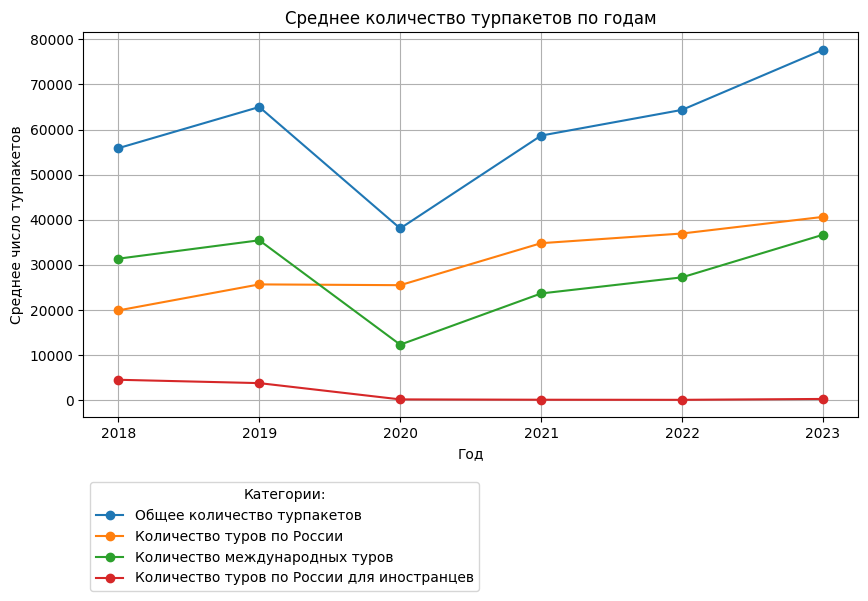

In [61]:
# Задаем размер графика
plt.figure(figsize=(10, 5)) 

# Для общей оси х возьмем данные столбца 'year' датафрейма count_tour_total
plt.plot(count_tour_total['year'], count_tour_total['count_tour_total'], marker='o', label = 'Общее количество турпакетов')
plt.plot(count_tour_total['year'], count_tour_domestic['count_tour_domestic'], marker='o', label = 'Количество туров по России')
plt.plot(count_tour_total['year'], count_tour_international['count_tour_international'], marker='o', label = 'Количество международных туров ')
plt.plot(count_tour_total['year'], count_tour_foreigners_in_russia['count_tour_foreigners_in_russia'], marker='o', label = 'Количество туров по России для иностранцев')

#Заголовок
plt.title('Среднее количество турпакетов по годам')

#Подписи осей
plt.xlabel('Год')
plt.ylabel('Среднее число турпакетов')

# Отображаем легенду, загаловок внутри легенды, расположение легенды
#plt.legend(title='Категории:', prop={'size':9}, loc=2)
plt.legend(title='Категории:', bbox_to_anchor=(0, -0.15), loc=2)

# Отображаем дополнительные линии
plt.grid(True)
plt.show()

**Динамика общего числа туров:
2020 год характеризуется серьезным снижением числа реализованных турпакетов, что вероятно связано с пандемией COVID-19 (ограничения на передвижение, закрытие границ). В 2022 году удалось восстановить докризисный уровень.**

**Внутренний туризм: наблюдается увеличение спроса на туры по России, что вероятно связано с развитием туриндустрии (новые курорты, кешбэк за путешествия по России), а также снижением интереса или сложностью с выездом за рубеж.**

**Международный туризм: в 2020 году обвал из-за пандемии. После 2020 года направления постепенно восстанавливается, однако введенные санкции и политическая обстановка сказывается на объемах турпакетов. К концу 2023 года направление так и не смогло обогнать внутренний туризм.**

**Туры по России для иностранцев: наблюдаем ожидаемое снижение интереса иностранцев связанное в 2020 году с пандемийными ограничениями. За несколько лет из-за политической обстановки так и не удалось восстановить объемы и привлечь зарубежных туристов.**

## Проверка гипотез  

### Гипотеза 1.  
Некоторые СМИ утверждают, что средняя стоимость реализованных турпакетов в 2023 году составляет 800 млн рублей. Однако аналитики подозревают, что этот показатель может быть больше. Задача — провести статистический тест, который поможет определить, можно ли отвергнуть нулевую гипотезу в пользу альтернативной.   
**Нулевая гипотеза Н0:** средняя стоимость реализованных турпакетов в 2023 году составляет 800 млн рублей, т.е. μ=800.  
**Альтернативная гипотеза Н1:** средняя стоимость реализованных турпакетов в 2023 году больше 800 млн рублей, т.е. μ>800 

In [62]:
from scipy import stats as st

In [85]:
# Ожидаемое среднее значение стоимости реализованных турпакетов в 2023 году (в млн рублей)
mu = 800

# Уровень статистической значимости
alpha = 0.05

# сохраняем данные стоимости турпакетов
cost = tour_cost['cost_tour_total_million_2023']

results = st.ttest_1samp(cost, mu, alternative = 'greater')
results.pvalue
print('Значение p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Результат не является достаточно экстремальным, чтобы отвернуть нулевую гипотезу')

Значение p-value: 0.04595368384081744
Отвергаем нулевую гипотезу


**Это означает, что средняя стоимость реализованных турпакетов в 2023 году c большой вероятностью превышает 800 млн рублей.**

### Гипотеза 2.
Статистика говорит, что в 2023 году, по сравнению с 2022, россияне стали чаще ездить по стране и оформлять турпакеты. Задача - проверить, действительно ли это так.   
**Нулевая гипотеза Н0:** среднее количество оформленных турпутевок одинаково в 2022 и в 2023 году, т.е. μ1=μ2.  
**Альтернативная гипотеза Н1:** среднее количество оформленных турпутевок в 2023 году больше, чем в 2022, т.е. μ1<μ2

In [68]:
tour_firm.head()

,region,count_tour_total_2018,count_tour_domestic_2018,count_tour_international_2018,count_tour_foreigners_in_russia_2018,count_tour_total_2019,count_tour_domestic_2019,count_tour_international_2019,count_tour_foreigners_in_russia_2019,count_tour_total_2020,count_tour_domestic_2020,count_tour_international_2020,count_tour_foreigners_in_russia_2020,count_tour_total_2021,count_tour_domestic_2021,count_tour_international_2021,count_tour_foreigners_in_russia_2021,count_tour_total_2022,count_tour_domestic_2022,count_tour_international_2022,count_tour_foreigners_in_russia_2022,count_tour_total_2023,count_tour_domestic_2023,count_tour_international_2023,count_tour_foreigners_in_russia_2023
0,Белгородская область,14138,4333,9805,0,20646,4772,15874,0,9694,5462,4232,0,14901,5662,9239,0,15222,8887,6165,170,17733,11803,5930,0
1,Брянская область,9444,4438,5004,2,10459,4966,5492,1,3435,2336,1099,0,7301,3822,3479,0,11591,8265,3326,0,10165,5377,4788,0
2,Владимирская область,23900,12294,11243,363,23065,11558,10394,1113,7334,4282,2978,74,14730,8297,6426,7,18288,11359,6924,5,22334,13588,8737,9
3,Воронежская область,14554,8124,6430,0,14464,4613,9851,0,6681,3500,3181,0,16296,8373,7923,0,20958,13608,7350,0,24993,14781,10212,0
4,Ивановская область,17049,6592,10457,0,17019,8327,8692,0,6477,4167,2310,0,10167,5722,4445,0,13637,8575,5062,0,18904,11002,7902,0


In [69]:
# Уровень статистической значимости
alpha = 0.05

# сохраняем данные стоимости турпакетов
tour_2022 = tour_firm['count_tour_domestic_2022']
tour_2023 = tour_firm['count_tour_domestic_2023']
print("Среднее количество турпакетов по России в 2022 году:", tour_2022.mean().round())
print("Среднее количество турпакетов по России в 2023 году:", tour_2023.mean().round())

results = st.ttest_ind(tour_2022, tour_2023, alternative = 'less')
results.pvalue
print('Значение p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Результат не является достаточно экстремальным, чтобы отвернуть нулевую гипотезу')

Среднее количество турпакетов по России в 2022 году: 36970.0
Среднее количество турпакетов по России в 2023 году: 40650.0
Значение p-value: 0.43088448306931165
Результат не является достаточно экстремальным, чтобы отвернуть нулевую гипотезу


**Данные не подтверждают, что россияне стали больше путешествовать в 2023 году по сравнению с 2022 годом.
Хотя среднее количество туров в 2023 году выше, разница недостаточно значима с точки зрения статистики. Значение p-value = 0.431 говорит о высокой вероятности того, что наблюдаемые различия могли возникнуть случайно.**

**В результате проделанной работы можно зафиксировать следующие моменты:**
1. **Развитие инфраструктуры туризма в регионах неравномерно. В целом мы наблюдаем рост числа хостелов и гостиниц в регионах России, но вместе с тем и сильный разброс, например регионы-аутсайдеры с менее 50 гостиницами и лидеры - с 1000 объектами. Необходима балансировка туристического потока в малых регионах.**
2. **Данные показывают, что Москва доминирует по объему реализованных туров. Регионы могут переломить эту тенденцию через развитие уникальных предложений (экотуризм, гастротуры, культурные маршруты и т.д.). Необходима поддержка малого бизнеса - локальных туроператоров.**
3. **Кризис 2020 года изменил структуру рынка на долгие годы. Интерес иностранцев так и не восстановился. Данные и графики подтверждают переориентирование на внутреннего потребителя и внутренний туризм.**